In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from ndac.data_processing import quantile_classify, encode_sequence, value_classify
from ndac.predict import train_clstm
from sklearn.model_selection import train_test_split

In [77]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_prest.csv', index_col=0)

# train with nucleotide seq

45206 samples input.
11302 samples in class 0
11301 samples in class 1
22603 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 10)           740       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 128)          3968      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 96,409
Trainable params: 96,409
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
15677/15677 [===============

KeyboardInterrupt: 

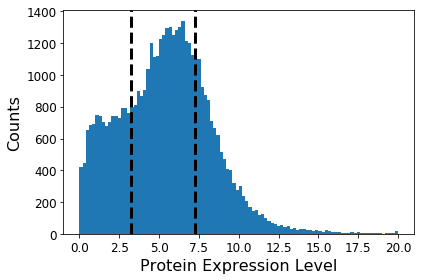

In [4]:
# split quantiles and encode with nucleotide sequence
df, hist = quantile_classify(data['conc_cf'], data['nt_seq'],
                             [0.25, 0.75], drop_class=[1])
X, y = encode_sequence(df['nt_seq'], df['class'],
                       max_length=200, tag='GACAAGCTTGCGGCCGCA')

nt_model = train_clstm(X, y, test_fraction=0.3, 
                       epochs=15)

# train with amino acid sequence

45206 samples input.
11302 samples in class 0
11301 samples in class 1
22603 samples removed.


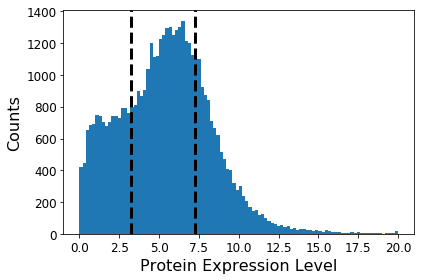

In [78]:
df, hist = quantile_classify(data['conc_cf'], data['aa_seq'],
                             [0.25, 0.75], drop_class=[1])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)

45206 samples input.
11302 samples in class 0
11301 samples in class 1
22603 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 10)           210       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 128)          3968      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 95,879
Trainable params: 95,879
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
15822/15822 [===============

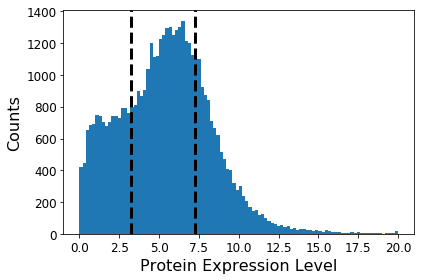

In [5]:
aa_model = train_clstm(X, y, test_fraction=0.3, epochs=15)

In [79]:
# fix random seed for reproducibility
np.random.seed(7)
X = pd.DataFrame(X)
y = pd.Series(y)

In [80]:
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0,0,0,0,0,0,0,0,0,...,3,3,5,4,5,14,4,10,5,3
1,0,0,0,0,0,0,0,0,0,0,...,6,7,7,6,7,17,1,11,10,10
2,0,0,0,0,0,0,0,0,0,0,...,11,7,15,3,11,14,9,1,7,7
3,0,0,0,0,0,0,0,0,0,0,...,3,3,8,2,9,13,2,1,13,6
4,0,0,0,0,0,0,0,0,0,0,...,9,11,7,15,1,4,20,7,4,2
5,0,0,0,0,0,0,0,0,0,0,...,5,14,3,12,3,2,19,4,9,1
6,0,0,0,0,0,0,0,0,0,0,...,2,7,6,5,4,9,7,11,13,19
7,0,0,0,0,0,0,0,0,0,0,...,2,15,8,1,1,11,12,19,3,10
8,0,0,0,0,0,0,0,0,0,0,...,12,14,3,7,3,8,12,19,14,19
9,0,0,0,0,0,0,0,0,0,0,...,17,10,8,8,4,1,3,4,17,18


In [81]:
X_train, X_test, y, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
y_pred = aa_model.predict(X_test.values).round()

In [65]:
df['conc_cf']

1         2.91540
2         1.48770
5         1.50290
8         0.92003
10        2.21830
11        1.17150
12        0.52137
14        3.00940
16        1.02940
26        1.69000
27        3.25790
30        2.46000
31        3.10000
34        0.52000
36        1.32000
39       17.18300
41        1.56000
42        1.02310
44        8.90690
49        7.68000
50       10.71800
53       11.29300
54        1.22000
55        3.12230
59        2.42000
61        0.35934
63        2.40000
64        2.23610
66        1.52830
68        9.10930
           ...   
45161     7.98000
45166    11.36000
45168    11.73000
45169     9.41000
45171     9.12000
45172     8.25000
45173     2.14000
45174    12.00000
45179     8.77000
45181     2.32000
45182     9.17000
45185     2.13000
45186     9.22000
45187     1.17000
45188     1.65000
45189     7.72000
45190    10.84000
45191     7.37000
45193     8.33000
45194     9.49000
45195     3.17000
45197     8.06000
45198     7.66000
45199    12.08000
45200    1

In [70]:
pd.
new_data = pd.DataFrame(np.zeros((len(y_test), 3)), index=X_test.index,
                        columns=['conc_cf', 'y_true', 'y_pred'])
new_data['conc_cf'] = df.loc[X_test.index, 'conc_cf'].values

/Users/joshsmith/Git/NovoNordisk_Capstone/.env/lib/python3.6/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [75]:
data.loc[X_test.index, 'conc_cf'].values

array([5.6524, 2.2203, 7.32  , ..., 6.8834, 1.88  , 2.6073])

In [71]:
new_data

,conc_cf,y_true,y_pred
19304,NaN,0.0,0.0
7416,2.22030,0.0,0.0
10504,7.32000,0.0,0.0
14180,11.65300,0.0,0.0
1618,7.61000,0.0,0.0
7013,2.46570,0.0,0.0
8783,10.09000,0.0,0.0
6455,NaN,0.0,0.0
10431,2.68350,0.0,0.0
11060,NaN,0.0,0.0


In [39]:
df['correct'] = np.equal(df['y_true'], df['y_pred'])

In [44]:
x1 = df.loc[df['correct'] == True, 'conc_cf'].values
x2 = df.loc[df['correct'] == False, 'conc_cf'].values

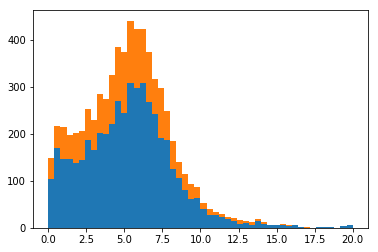

In [47]:
#Stack the data
plt.figure()
plt.hist([x1, x2], 50, stacked=True)
plt.show()

In [48]:
data.loc[X_test.index, 'conc_cf'].values

array([5.6524, 2.2203, 7.32  , ..., 6.8834, 1.88  , 2.6073])

# solubility multiclass

In [18]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_solubility.csv', index_col=0)

16082 samples input.
3324 samples in class 0
7667 samples in class 1
5091 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 93,449
Trainable params: 93,449
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
7693/7693 [=====================

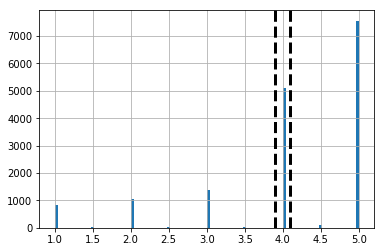

In [20]:
df, hist = value_classify(data['solubility_class_1M'], data['aa_seq'],
                             [3.9, 4.1], drop_class=[1])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)
aa_model = train_clstm(X, y, test_fraction=0.3, epochs=1)

16082 samples input.
838 samples in class 0
1071 samples in class 1
1394 samples in class 2
5112 samples in class 3
7667 samples in class 4
0 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 93,853
Trainable params: 93,853
Non-trainable params: 0
_____________________________________________

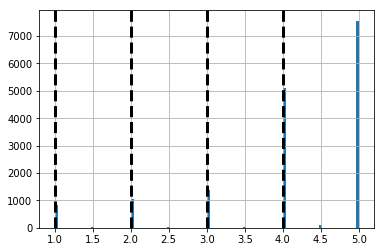

In [22]:
df, hist = value_classify(data['solubility_class_1M'], data['aa_seq'],
                             [1, 2, 3, 4])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)
aa_model = train_clstm(X, y, test_fraction=0.3, epochs=1)